In [1]:
import detectron2
from detectron2.data import DatasetCatalog,MetadataCatalog
from plain_train_net import grab_train,grab_valid
from detectron2.utils.visualizer import Visualizer
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

try:
    DatasetCatalog.register("rpd_valid", grab_valid)
except:
    print('Already registered.')
    #do nothing
try:
    DatasetCatalog.register("rpd_train", grab_train)
except:
    print('Already registered.')
    #do nothing
try:
    MetadataCatalog.get("rpd_valid").thing_classes = ["rpd"]
except:
    print('Already registered.')
    #do nothing
try:
    MetadataCatalog.get("rpd_train").thing_classes = ["rpd"]   
except:
    print('Already registered.')
    #do nothing

In [2]:
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file('configs/working')
cfg.merge_from_list(['SOLVER.IMS_PER_BATCH', '1'])

In [29]:
from detectron2.data import build_detection_train_loader
#myloader = build_detection_train_loader(cfg)
from detectron2.data import transforms as T
# Define a sequence of augmentations:
augs = [
    T.RandomBrightness(.9, 1.1),
    T.RandomFlip(prob=0.5),
    T.RandomRotation([-10,10]),
    T.RandomContrast(.8,1.2)
    #T.RandomCrop("absolute", (640, 640))
]  # type: T.Augmentation
from detectron2.data import DatasetMapper   # the default mapper
myloader = build_detection_train_loader(cfg,
                                          mapper=DatasetMapper(cfg, is_train=True, augmentations=augs)
                                         )

In [30]:
import torch
def get_inputs():
    with torch.no_grad():
        for data in myloader:
            yield data
gen = get_inputs()

In [33]:
inputs = next(gen)

inputs[0]['instances']

Instances(num_instances=7, image_height=739, image_width=1116, fields=[gt_boxes: Boxes(tensor([[ 531.1709,  258.6419,  565.1216,  274.7162],
        [ 487.6294,  246.3103,  523.7678,  263.8573],
        [ 623.5969,  280.6973,  652.7096,  295.5089],
        [ 689.1829,  289.8762,  713.7527,  308.0106],
        [ 805.3786,  316.7723,  845.1348,  334.3618],
        [ 862.2563,  322.7108,  892.8843,  343.3280],
        [1025.6538,  353.0201, 1059.4371,  375.3625]])), gt_classes: tensor([0, 0, 0, 0, 0, 0, 0]), gt_masks: PolygonMasks(num_instances=7)])

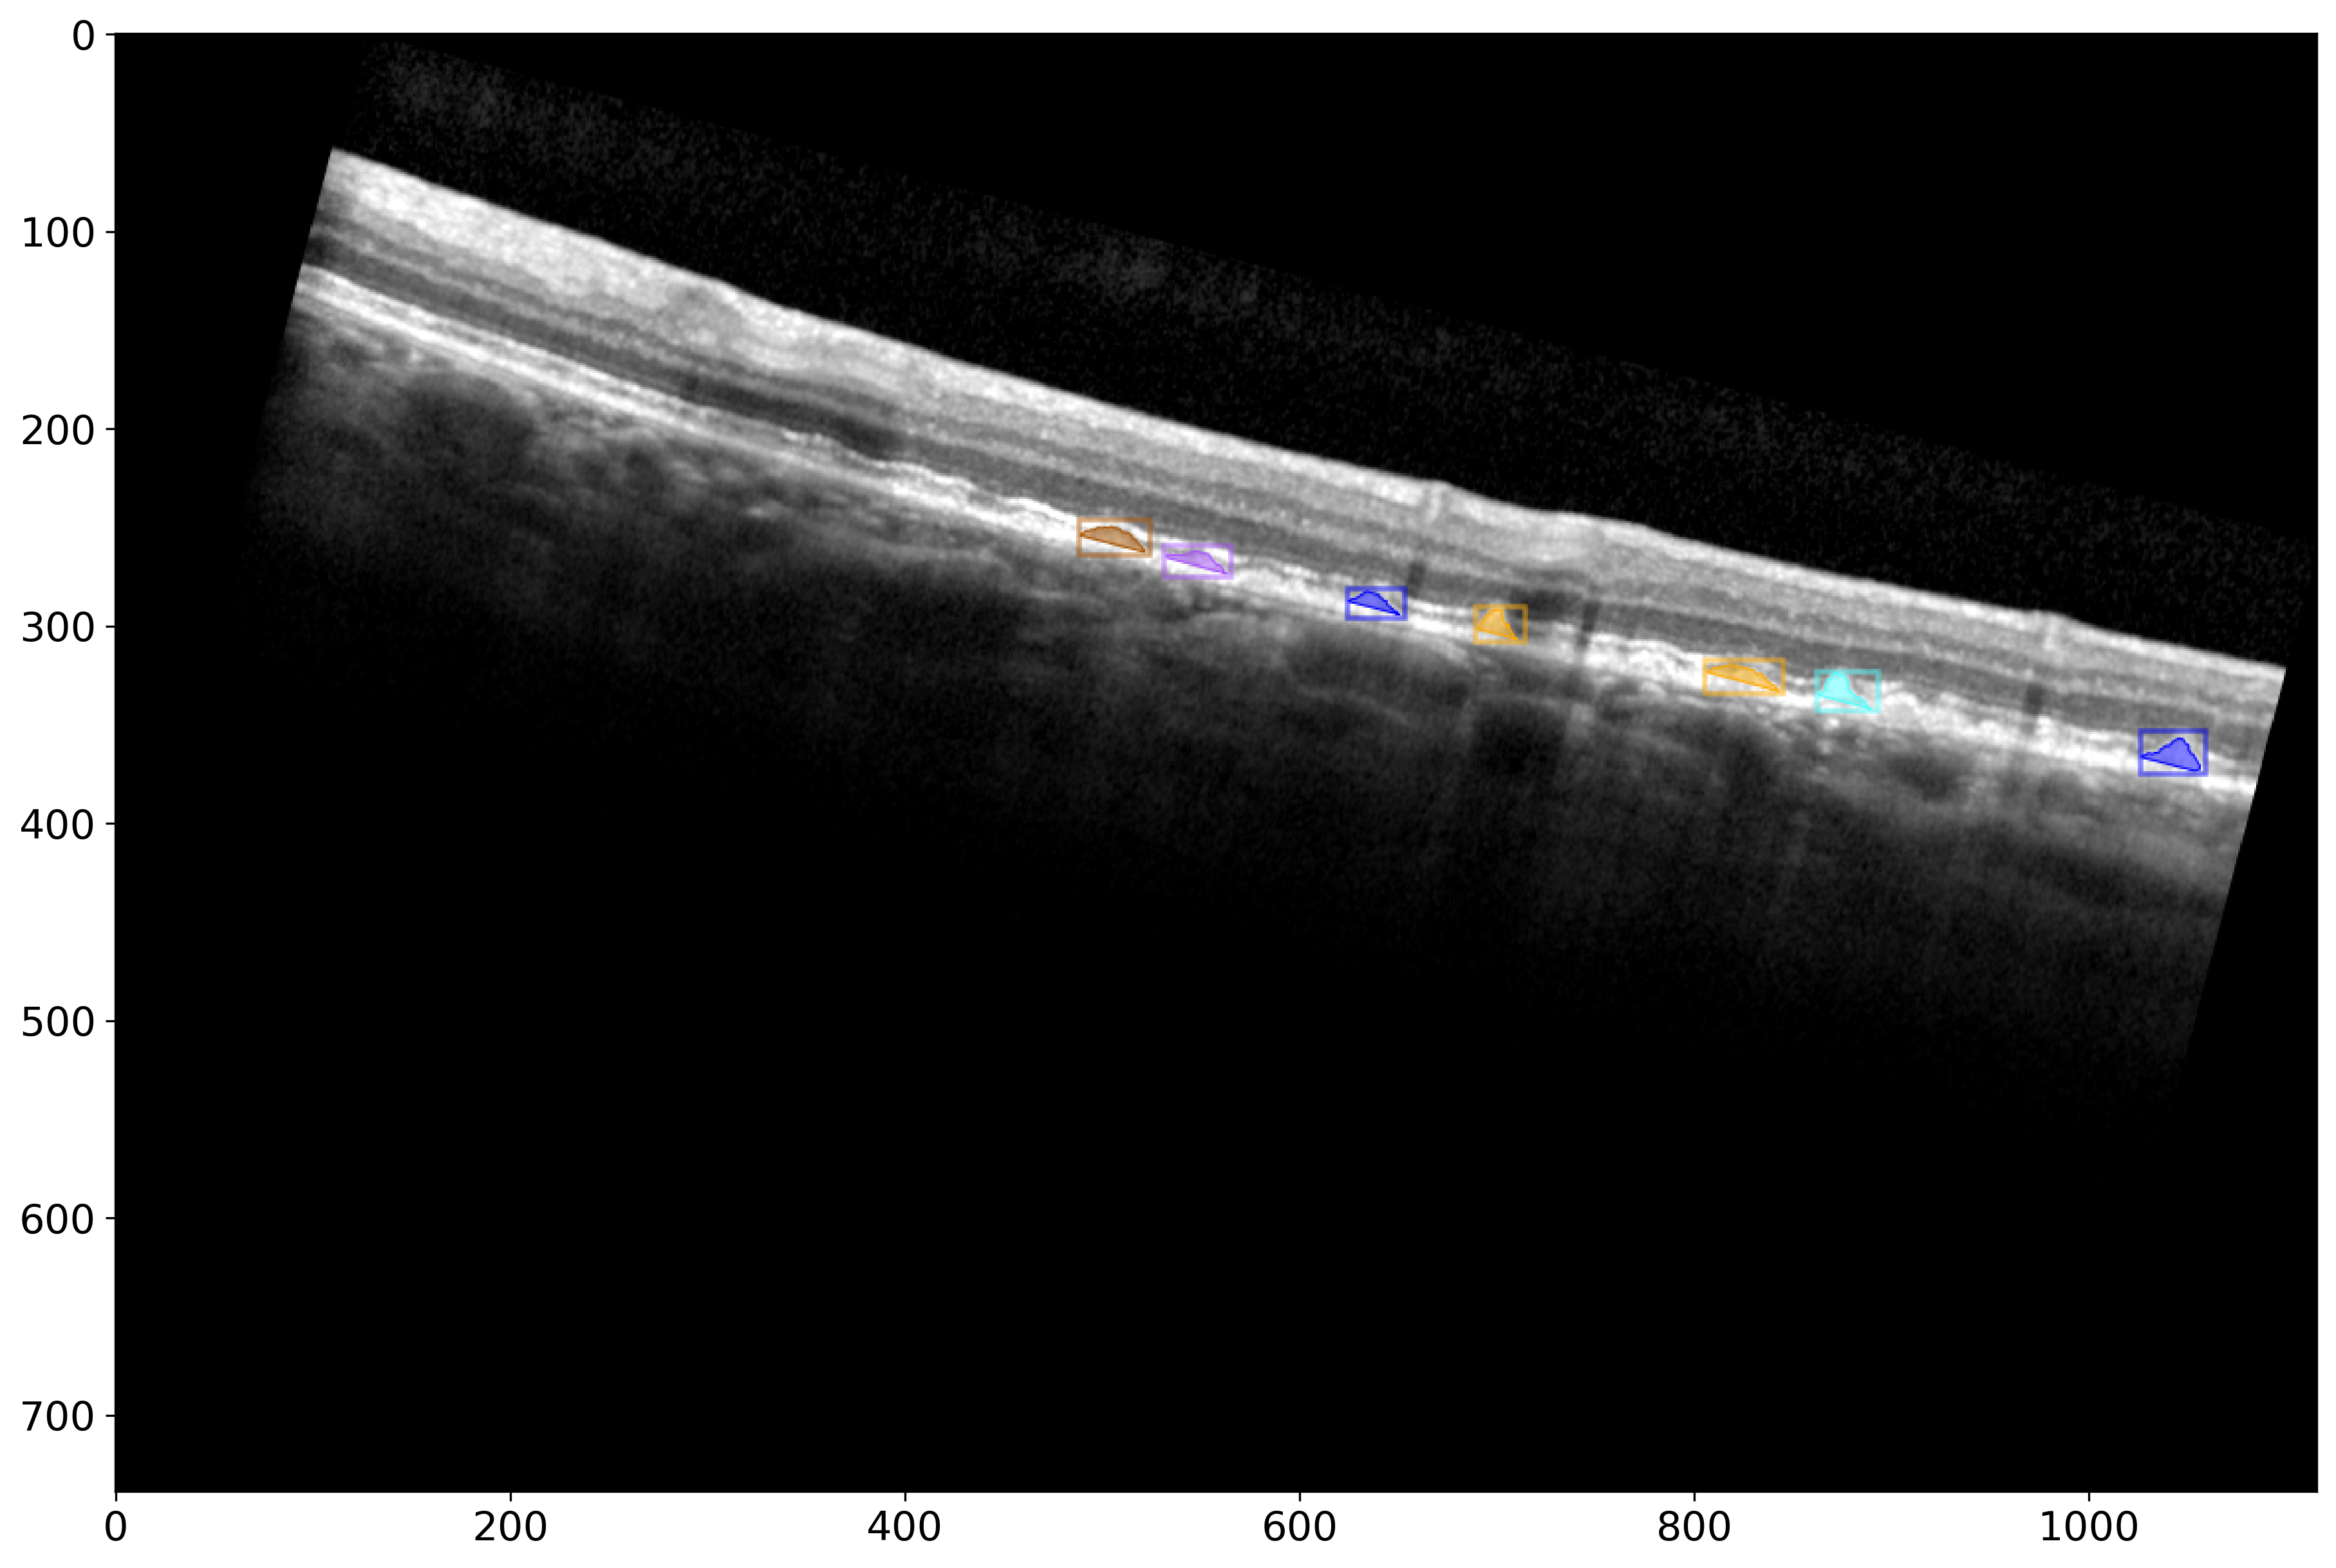

In [34]:
im = torch.movedim((inputs[0]['image']),0,2)
plt.figure(figsize=[22,10],dpi=300)
# plt.imshow(im)
v = Visualizer(im, MetadataCatalog.get("rpd_train"), scale=1.0)
if len(inputs[0]['instances'])>0:
    result_image =v.overlay_instances(boxes = inputs[0]['instances'].gt_boxes,masks = inputs[0]['instances'].gt_masks).get_image()
    plt.imshow(result_image)
else:
    plt.imshow(im)

